# Flight Price Forecast - Exploratory Data Analysis (EDA)

This notebook conducts comprehensive exploratory data analysis on the cleaned airline dataset to:

- Visualize fare distributions across different dimensions
- Analyze route differences and pricing patterns
- Identify seasonal trends in airline pricing
- Examine airline-specific behaviors and market dynamics
- Understand data characteristics for model building

**Prerequisites**: Run `01_data_preprocessing.ipynb` first to generate cleaned data.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure plotting
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully for EDA!")

Libraries imported successfully for EDA!


## 2. Load Cleaned Data


In [2]:
# Load cleaned data from preprocessing notebook
try:
    df = pd.read_csv('../data/cleaned_data.csv')
    print("✓ Loaded cleaned data successfully!")
except FileNotFoundError:
    print("Cleaned data not found. Loading original dataset...")
    df = pd.read_csv('../US Airline Flight Routes and Fares 1993-2024.csv')
    # Basic cleaning
    df = df.dropna()
    print("✓ Original dataset loaded and basic cleaning applied.")

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Quick overview
print("\nDataset Overview:")
print("="*50)
print(df.info())

print("\nFirst 5 rows:")
df.head()

✓ Loaded cleaned data successfully!
Dataset shape: (176982, 23)
Columns: ['tbl', 'Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1', 'city2', 'airportid_1', 'airportid_2', 'airport_1', 'airport_2', 'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg', 'carrier_low', 'lf_ms', 'fare_low', 'Geocoded_City1', 'Geocoded_City2', 'tbl1apk']

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176982 entries, 0 to 176981
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             176982 non-null  object 
 1   Year            176982 non-null  int64  
 2   quarter         176982 non-null  int64  
 3   citymarketid_1  176982 non-null  int64  
 4   citymarketid_2  176982 non-null  int64  
 5   city1           176982 non-null  object 
 6   city2           176982 non-null  object 
 7   airportid_1     176982 non-null  int64  
 8   airportid_2     176982 non-null  int64  
 

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table 1a,2010,1,34614,33195,"Salt Lake City, UT","Tampa, FL (Metropolitan Area)",14869,15304,SLC,...,226.59,DL,0.38,247.69,US,0.20,166.99,"Salt Lake City, UT\n(40.758478, -111.888142)","Tampa, FL (Metropolitan Area)\n(37.8606, -78.8...",201011486915304SLCTPA
1,Table 1a,1998,4,30189,31703,"Colorado Springs, CO","New York City, NY (Metropolitan Area)",11109,12197,COS,...,280.39,UA,0.73,292.60,NW,0.24,248.27,"Colorado Springs, CO\n(38.835224, -104.819798)","New York City, NY (Metropolitan Area)\n(40.123...",199841110912197COSHPN
2,Table 1a,1998,4,30198,30852,"Pittsburgh, PA","Washington, DC (Metropolitan Area)",14122,10821,PIT,...,239.12,US,0.93,245.70,CO,0.03,71.30,"Pittsburgh, PA\n(40.442169, -79.994945)","Washington, DC (Metropolitan Area)\n(38.892062...",199841412210821PITBWI
3,Table 1a,1993,4,30255,30852,"Huntsville, AL","Washington, DC (Metropolitan Area)",12217,12264,HSV,...,242.76,DL,0.48,275.50,UA,0.25,197.69,"Huntsville, AL\n(34.729538, -86.585283)","Washington, DC (Metropolitan Area)\n(38.892062...",199341221712264HSVIAD
4,Table 1a,2010,4,33198,32575,"Kansas City, MO","Los Angeles, CA (Metropolitan Area)",13198,14908,MCI,...,201.46,WN,0.38,208.53,F9,0.11,162.07,"Kansas City, MO\n(39.099792, -94.578559)","Los Angeles, CA (Metropolitan Area)\n(34.05223...",201041319814908MCISNA


## 3. Statistical Analysis and Distribution


COLUMN ANALYSIS
Numeric columns (13): ['Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'airportid_1', 'airportid_2', 'nsmiles', 'passengers', 'fare', 'large_ms', 'fare_lg', 'lf_ms', 'fare_low']
Categorical columns (10): ['tbl', 'city1', 'city2', 'airport_1', 'airport_2', 'carrier_lg', 'carrier_low', 'Geocoded_City1', 'Geocoded_City2', 'tbl1apk']

NUMERIC COLUMNS STATISTICS
                Year        quarter  citymarketid_1  citymarketid_2  \
count  176982.000000  176982.000000   176982.000000   176982.000000   
mean     2006.070510       2.455967    31535.141020    32208.274096   
std         7.375819       1.115038     1054.490086     1248.363772   
min      1993.000000       1.000000    30135.000000    30189.000000   
25%      2000.000000       1.000000    30721.000000    31066.000000   
50%      2006.000000       2.000000    31295.000000    32337.000000   
75%      2012.000000       3.000000    32467.000000    33195.000000   
max      2020.000000       4.000000    34986.0000

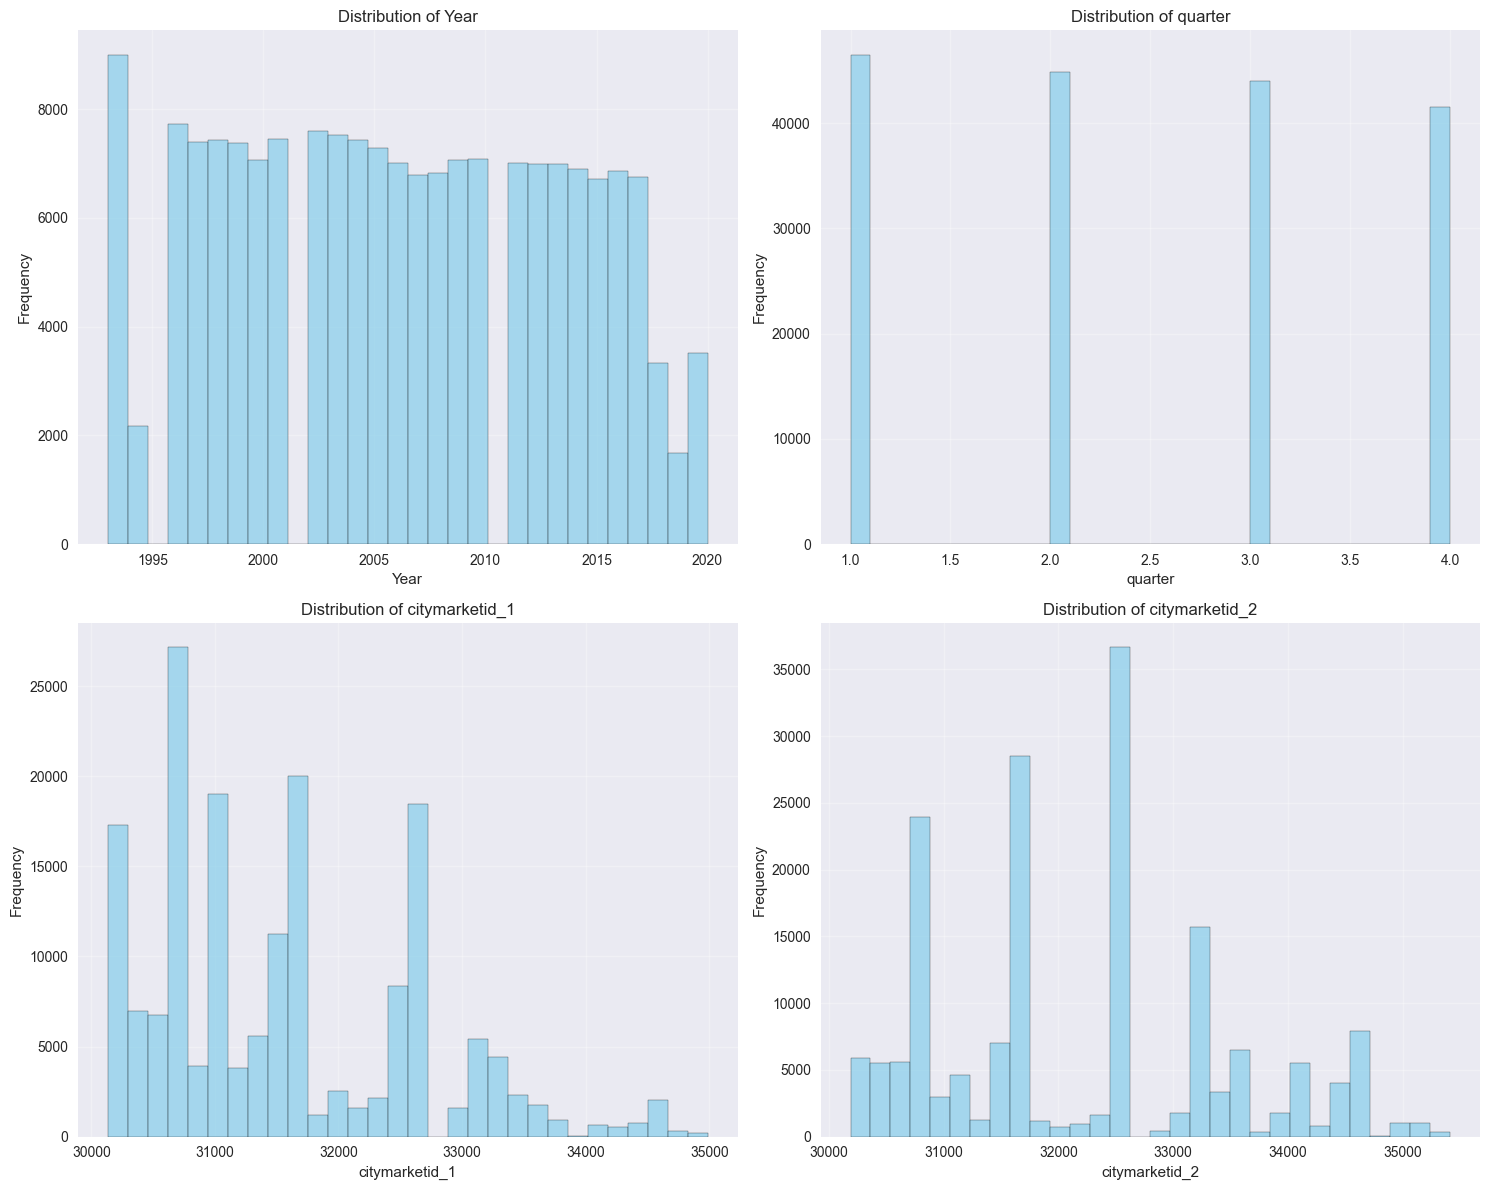


CATEGORICAL COLUMNS ANALYSIS

TBL:
  Unique values: 2
  Most common values:
    Table 1a: 171803 (97.1%)
    Table1a: 5179 (2.9%)

CITY1:
  Unique values: 133
  Most common values:
    Los Angeles, CA (Metropolitan Area): 17298 (9.8%)
    Boston, MA (Metropolitan Area): 17015 (9.6%)
    New York City, NY (Metropolitan Area): 16695 (9.4%)
    Chicago, IL: 12253 (6.9%)
    Houston, TX: 10554 (6.0%)
    Dallas/Fort Worth, TX: 10324 (5.8%)
    Cleveland, OH (Metropolitan Area): 7461 (4.2%)
    Miami, FL (Metropolitan Area): 5708 (3.2%)
    Columbus, OH: 2763 (1.6%)
    Austin, TX: 2739 (1.5%)

CITY2:
  Unique values: 121
  Most common values:
    New York City, NY (Metropolitan Area): 26236 (14.8%)
    Washington, DC (Metropolitan Area): 22847 (12.9%)
    Los Angeles, CA (Metropolitan Area): 15429 (8.7%)
    San Francisco, CA (Metropolitan Area): 14462 (8.2%)
    Tampa, FL (Metropolitan Area): 6281 (3.5%)
    Miami, FL (Metropolitan Area): 6162 (3.5%)
    Houston, TX: 4788 (2.7%)
    Norf

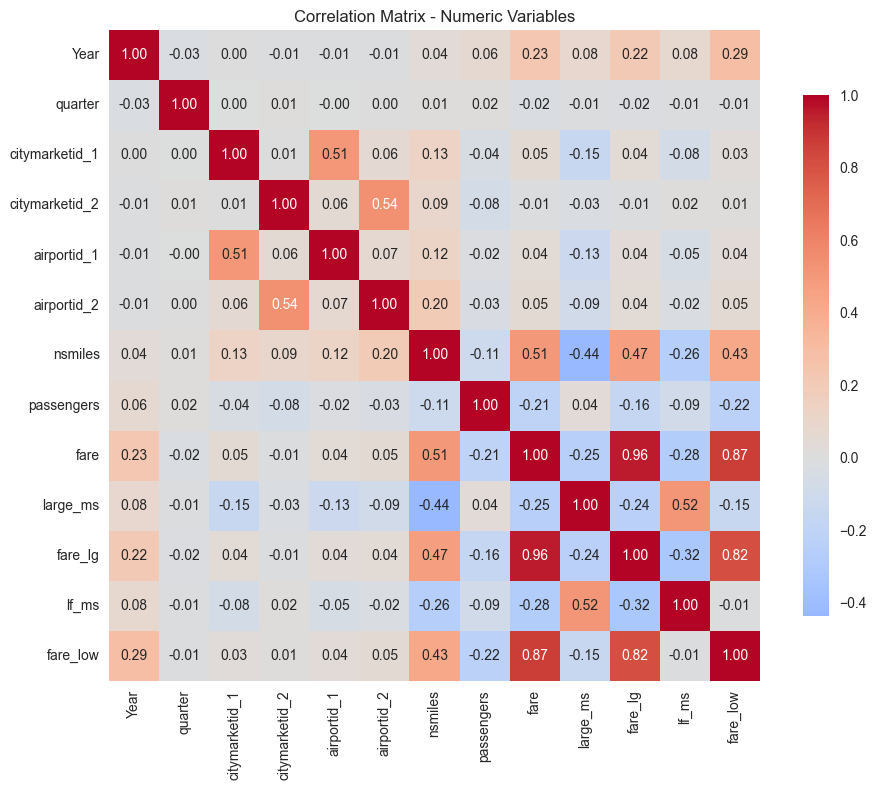


Highly correlated pairs (|correlation| > 0.7):
  fare - fare_lg: 0.956
  fare - fare_low: 0.869
  fare_lg - fare_low: 0.820

✓ Statistical analysis completed!


In [3]:
# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(
    include=['object', 'category']).columns.tolist()

print("COLUMN ANALYSIS")
print("="*50)
print(f"Numeric columns ({len(numeric_cols)}): {numeric_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

# Statistical summary for numeric columns
if len(numeric_cols) > 0:
    print(f"\nNUMERIC COLUMNS STATISTICS")
    print("="*50)
    print(df[numeric_cols].describe())

    # Distribution plots for numeric columns
    n_cols = min(len(numeric_cols), 4)  # Show max 4 columns
    if n_cols > 0:
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.ravel()

        for i, col in enumerate(numeric_cols[:n_cols]):
            # Histogram
            axes[i].hist(df[col].dropna(), bins=30, alpha=0.7,
                         color='skyblue', edgecolor='black')
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
            axes[i].grid(True, alpha=0.3)

        # Hide extra subplots
        for i in range(n_cols, 4):
            axes[i].set_visible(False)

        plt.tight_layout()
        plt.show()

# Categorical columns analysis
if len(categorical_cols) > 0:
    print(f"\nCATEGORICAL COLUMNS ANALYSIS")
    print("="*50)

    for col in categorical_cols[:3]:  # Analyze first 3 categorical columns
        print(f"\n{col.upper()}:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Most common values:")
        value_counts = df[col].value_counts().head(10)
        for value, count in value_counts.items():
            percentage = (count / len(df)) * 100
            print(f"    {value}: {count} ({percentage:.1f}%)")

# Correlation analysis for numeric columns
if len(numeric_cols) > 1:
    print(f"\nCORRELATION ANALYSIS")
    print("="*50)

    correlation_matrix = df[numeric_cols].corr()

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
    plt.title('Correlation Matrix - Numeric Variables')
    plt.tight_layout()
    plt.show()

    # Find highly correlated pairs
    print("\nHighly correlated pairs (|correlation| > 0.7):")
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.7:
                col1, col2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
                print(f"  {col1} - {col2}: {corr_value:.3f}")

print(f"\n✓ Statistical analysis completed!")